<a href="https://colab.research.google.com/github/rashmi0888/Deep-Learning/blob/master/DNN/DNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Neural Network for MNIST dataset

### Import relevant components

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import itertools
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.callbacks import CSVLogger
np.random.seed(100)
# Disable warnings
import tensorflow as tf
import logging
tf.get_logger().setLevel(logging.ERROR)

Using TensorFlow backend.


### Data Preparation
#### 1. Data Dimensions
 MNIST database consists of 60,000 training and 10,000 test images. Each image is a 28x28 greyscale image having pixel values in range 0-255. Each image has its corresponding label, a number in range 0-9, which represents the image.

In [0]:
training_samples = 60000
test_samples = 10000
input_dim = 784
num_output_classes = 10
num_units = 512 # No of units in each hidden layer of DNN

#### 2. Download Data
Download data from keras dataset.

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### 3. Reshape and Normalize Data
Reshape 28X28 resolution images into vectors of size 784. Convert pixel values from 0-255 to 0-1. 

In [0]:
X_train = X_train.reshape(training_samples, input_dim)
X_train = X_train.astype('float32')
X_train /= 255

X_test = X_test.reshape(test_samples, input_dim)
X_test = X_test.astype('float32')
X_test /= 255

#### 4. One hot encoding
 Convert image labels into one-hot vectors.

In [0]:
Y_train = keras.utils.to_categorical(y_train, num_output_classes)
Y_test = keras.utils.to_categorical(y_test, num_output_classes)

#### 5. Shuffle Data
   Randomly shuffle data to later get a good validation set.

In [6]:
random_index = np.random.permutation(X_train.shape[0])
X_train, Y_train, y_train = X_train[random_index], Y_train[random_index], y_train[random_index]

print('No of training samples: ', X_train.shape[0])
print('No of test samples: ', X_test.shape[0])

No of training samples:  60000
No of test samples:  10000


### Train Model
#### 1. Build model
1. Build a DNN configuration of 3 hidden layers having 512 units each.
2. Sequential model is a linear stack of layers. On this model, add 4 dense layers which are fully connected layers. 
3. 3 dense layers correspond to 3 hidden layers and 4th one is output layer.
4. First layer needs info about input shape. Subsequent layers can do automatic shape inference.

#### 2. Compile model
1. After building model, configure the learning process.
2. Momentum parameter is used in learning.

#### 3. Fit model
1. Fit the model built above into the data.
2. Out of 60,000 traning samples, use 10,000 samples for validation.
3. Save metrics in history to later use them for plotting performance.
4. Also log metrics after each epoch into a csv file.

#### 4. Evaluate model
1. Evaluate model on test set.
2. Plot training and validation accuracy as a function of epochs.

In [0]:
def train_model(learning_rate, batch_size, momentum, epochs):
    # Build model
    model = Sequential()
    model.add(Dense(num_units, activation='relu', input_shape=(input_dim,)))
    model.add(Dense(num_units, activation='relu'))
    model.add(Dense(num_units, activation='relu'))
    model.add(Dense(num_output_classes, activation='softmax'))
    #model.summary()  # prints summary of model
    
    # Compile model
    sgd = SGD(lr=learning_rate, momentum=momentum, decay=1e-6)
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Fit model
    csv_logger = CSVLogger("model_history_log.csv", append=True)
    history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_split=0.16666,
                        shuffle=True, callbacks=[csv_logger])
    
    # Evaluate model
    score = model.evaluate(X_test, Y_test, verbose=0)
    #print('Test Loss:', score[0])
    print('Test Accuracy:', score[1])
    
    # Plot accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title("LR:{}, BS:{}".format(learning_rate, batch_size), pad=-20)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'val'], loc='lower right')

### Influence of learning rate and batch size on performance
1. Train and evaluate the model for various combinations of learning rates and batch sizes.
2. Plot training and validation accuracy as a function of epoch.


Learning_rate: 0.001, Batch_size: 32
Test Accuracy: 0.9752

Learning_rate: 0.001, Batch_size: 128
Test Accuracy: 0.9513

Learning_rate: 0.001, Batch_size: 1024
Test Accuracy: 0.8957

Learning_rate: 0.01, Batch_size: 32
Test Accuracy: 0.9846

Learning_rate: 0.01, Batch_size: 128
Test Accuracy: 0.9772

Learning_rate: 0.01, Batch_size: 1024
Test Accuracy: 0.9574

Learning_rate: 0.05, Batch_size: 32
Test Accuracy: 0.9819

Learning_rate: 0.05, Batch_size: 128
Test Accuracy: 0.9817

Learning_rate: 0.05, Batch_size: 1024
Test Accuracy: 0.977

Learning_rate: 0.1, Batch_size: 32
Test Accuracy: 0.101

Learning_rate: 0.1, Batch_size: 128
Test Accuracy: 0.9794

Learning_rate: 0.1, Batch_size: 1024
Test Accuracy: 0.9787


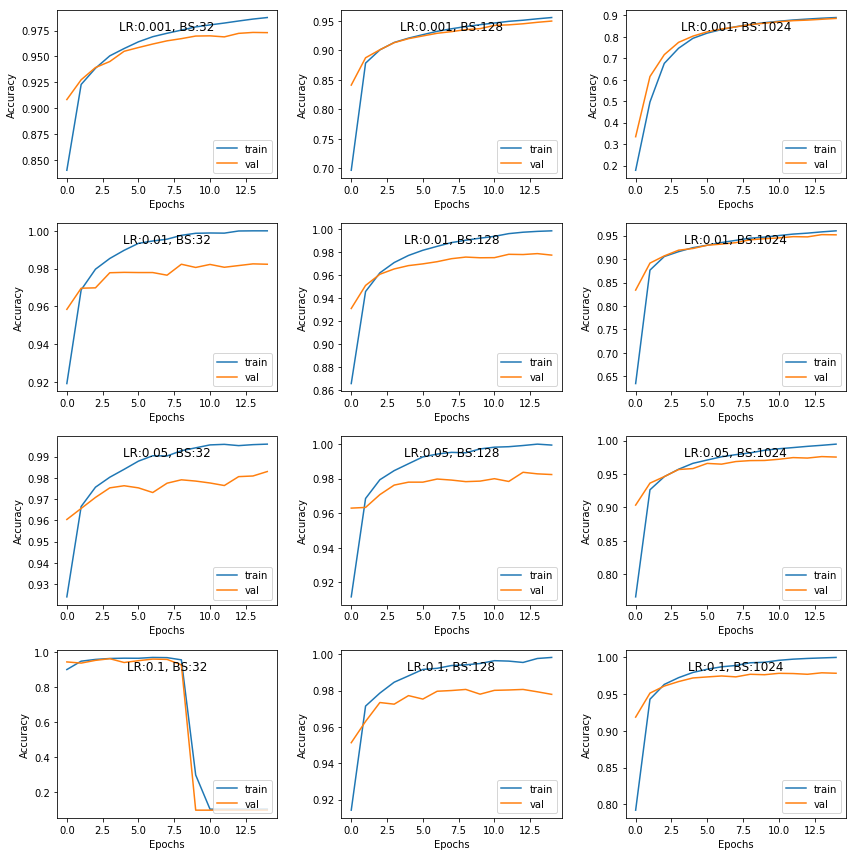

In [8]:
learning_rate = [0.001, 0.01, 0.05, 0.1]
batch_size = [32, 128, 1024]
grid = list(itertools.product(learning_rate, batch_size))
plt.figure(figsize=(12, 12))
for params in grid:
    print("\nLearning_rate: {}, Batch_size: {}".format(params[0], params[1]))
    plt.subplot(4, 3, grid.index(params) + 1)
    train_model(params[0], params[1], momentum = 0.9, epochs = 15)
plt.tight_layout()
plt.show()

#### Influence on validation accuracy
1. For a given learning rate, validation accuracy saturates faster for small batch sizes. This is because for smaller batch sizes, more updates are made to weights, thus learning process is faster. For larger batch sizes, more training epochs would be needed in order to reach same accuracy level. In other words, for a given learning rate and number of epochs, validation accuracy decreases with increasing batch size.
2. For a given batch size, validation accuracy saturates faster for large learning rates. This is because larger learning rates result in rapid changes to weights making learning process faster. Smaller learning rates, which make small changes to weights in each update, would need more training epochs in order to reach same accuracy level. In other words, for a given batch size and no of epochs, validation accuracy generally improves with increasing learning rate.
3. An exception to above observations is made. With learning rate = 0.1 and batch size = 32, there is sudden drop in both training and validation accuracy. This may be because learning rate is too high and model starts diverging.


#### Influence on test accuracy
1. For a given learning rate, test accuracy improves with decreasing batch size.
2. For a given batch size, test accuracy generally improves with increasing learning rate. 
3. Test accuracy is low for above  exception case.

### Influence of momentum on performance
1. Train and evaluate the model for various values of momentum parameter, keeping learning rate and batch size fixed.
2. Plot training and validation accuracy as a function of epoch.

Momentum: 0.0
Test Accuracy: 0.974
Momentum: 0.5
Test Accuracy: 0.9773
Momentum: 0.9
Test Accuracy: 0.9801
Momentum: 0.99
Test Accuracy: 0.9843


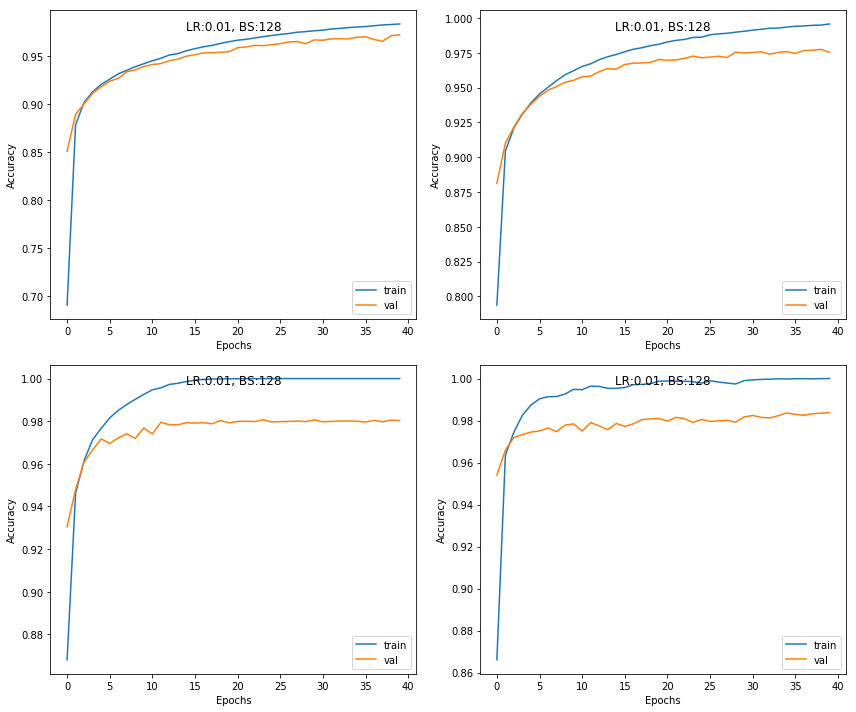

In [9]:
momentums = [0.0, 0.5, 0.9, 0.99]
plt.figure(figsize=(12, 10))
for i in range(len(momentums)):
    print("Momentum: {}".format(momentums[i]))
    plt.subplot(2, 2, i + 1)
    train_model(0.01, 128, momentums[i], epochs = 40)
plt.tight_layout()
plt.show()

1. Addition of momentum accelerates the training of the model i.e. there is faster convergence towards minima.
2. Specifically, momentum values of 0.9 and 0.99 achieve 100% train accuracy and 98% validation accuracy within about 10 epochs.
3. On other hand, when momentum is not used, highest train and validation accuracy is not attained even with 40 epochs. And convergence would require even larger no of epochs.